In [40]:
import pandas as pd
import numpy as np
import gc

import matplotlib.pyplot as plt
import matplotlib
#matplotlib.rc['font.size'] = 9.0
matplotlib.rc('font', size=20)
matplotlib.rc('axes', titlesize=20)
matplotlib.rc('axes', labelsize=20)
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('legend', fontsize=20)
matplotlib.rc('figure', titlesize=20)
import seaborn as sns

%matplotlib inline

In [132]:
import warnings
warnings.filterwarnings("ignore")

# Handling large CSVs

Since the input for this data `(data.csv)` is an extremely large CSV file `(1.9 GB)`, I'm going to randomly sample 1 million samples out of it for the purpose of this kernel.

In [18]:
import subprocess
#from https://stackoverflow.com/questions/845058/how-to-get-line-count-cheaply-in-python , Olafur's answer
def file_len(fname):
    p = subprocess.Popen(['wc', '-l', fname], stdout=subprocess.PIPE, 
                                              stderr=subprocess.PIPE)
    result, err = p.communicate()
    if p.returncode != 0:
        raise IOError(err)
    return int(result.strip().split()[0])

lines = file_len('data/chicago-divvy-bicycle-sharing-data/data.csv')
print('Number of lines in "train.csv" is:', lines)

Number of lines in "train.csv" is: 9495236


In [23]:
skiplines = np.random.choice(np.arange(1, lines), size=lines-1-1000000, replace=False)
skiplines=np.sort(skiplines)
print('lines to skip:', len(skiplines))

data = pd.read_csv("data/chicago-divvy-bicycle-sharing-data/data.csv", skiprows=skiplines)

lines to skip: 8495235


In [28]:
data.sample(5)

,trip_id,year,month,week,day,hour,usertype,gender,starttime,stoptime,...,from_station_id,from_station_name,latitude_start,longitude_start,dpcapacity_start,to_station_id,to_station_name,latitude_end,longitude_end,dpcapacity_end
957410,17300997,2017,11,47,0,9,Subscriber,Male,2017-11-20 09:17:00,2017-11-20 09:30:00,...,106,State St & Pearson St,41.897448,-87.628722,27.0,195,Columbus Dr & Randolph St,41.884728,-87.619521,47.0
421450,8820847,2016,2,8,5,14,Subscriber,Male,2016-02-27 14:25:00,2016-02-27 14:32:00,...,268,Lake Shore Dr & North Blvd,41.911722,-87.626804,39.0,85,Michigan Ave & Oak St,41.900960,-87.623777,23.0
414756,8918488,2016,3,10,4,17,Subscriber,Male,2016-03-11 17:43:00,2016-03-11 17:56:00,...,77,Clinton St & Madison St,41.882242,-87.641066,31.0,137,Morgan Ave & 14th Pl,41.862378,-87.651062,15.0
662685,12518046,2016,10,43,4,8,Subscriber,Male,2016-10-28 08:38:58,2016-10-28 08:46:07,...,77,Clinton St & Madison St,41.882242,-87.641066,31.0,283,LaSalle St & Jackson Blvd,41.878170,-87.631985,31.0
648780,12709179,2016,11,45,4,17,Subscriber,Male,2016-11-11 17:19:26,2016-11-11 17:25:37,...,331,Halsted St & Blackhawk St (*),41.908537,-87.648627,20.0,225,Halsted St & Dickens Ave,41.919936,-87.648830,15.0


In [31]:
data.isnull().sum(0)

trip_id              0
year                 0
month                0
week                 0
day                  0
hour                 0
usertype             0
gender               0
starttime            0
stoptime             0
tripduration         0
temperature          0
events               0
from_station_id      0
from_station_name    0
latitude_start       0
longitude_start      0
dpcapacity_start     0
to_station_id        0
to_station_name      0
latitude_end         0
longitude_end        0
dpcapacity_end       0
dtype: int64

In [74]:
num_to_month={
    1:"Jan",
    2:"Feb",
    3:"Mar",
    4:"Apr",
    5:"May",
    6:"June",
    7:"July",
    8:"Aug",
    9:"Sept",
    10:"Oct",
    11:"Nov",
    12:"Dec"
}
data['month'] = data.month.apply(lambda x: num_to_month[x])

**It seems there are no missing values in our randomly sampled population!**

## Ridership Over the last few Years

We can observe an increasing trend!

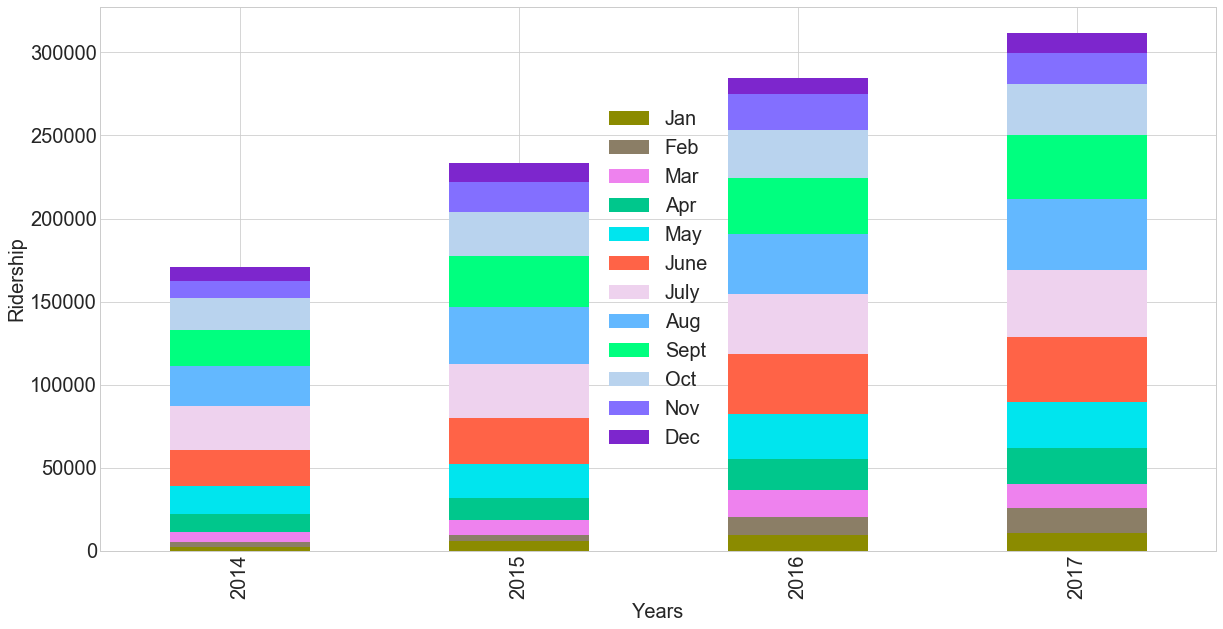

In [113]:
pivot = data.pivot_table(index='year', columns='month', values='day', aggfunc=len)
colors = ["#8B8B00", "#8B7E66", "#EE82EE", "#00C78C", 
          "#00E5EE", "#FF6347", "#EED2EE", 
          "#63B8FF", "#00FF7F", "#B9D3EE", 
          "#836FFF", "#7D26CD"]
pivot.loc[:,['Jan','Feb', 'Mar',
            'Apr','May','June',
            'July','Aug','Sept',
            'Oct','Nov','Dec']].plot.bar(stacked=True, figsize=(20,10), color=colors)
plt.xlabel("Years")
plt.ylabel("Ridership")
plt.legend(loc=10)
plt.show()

Apart from a gradually increasing tred, during peak months of **June, July, Aug & Sept** ridership seems to be significantly higher than in Holiday months of **Dec & Jan**.

Text(0.5,1,'Type of Customers')

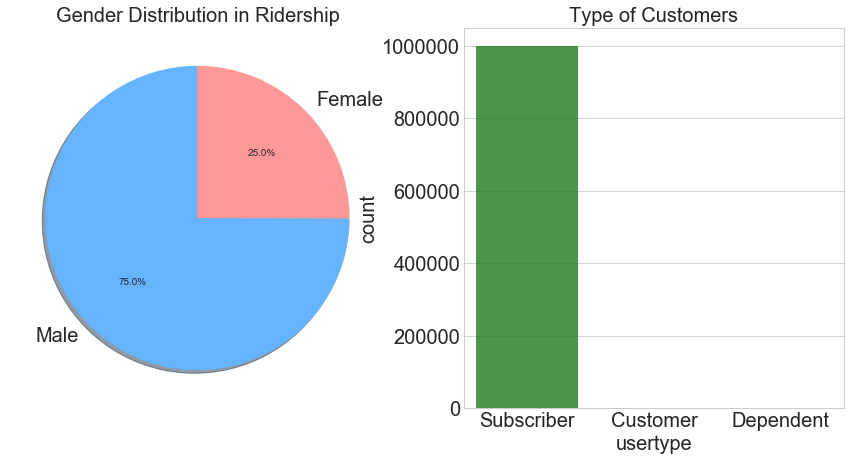

In [116]:
f, ax = plt.subplots(1,2, figsize=(15,7))
colors = ['#66b3ff','#ff9999']
pie = ax[0].pie(list(data['gender'].value_counts()), 
                   labels=list(data.gender.unique()),
                  autopct='%1.1f%%', shadow=True, startangle=90, colors=colors)
count = sns.countplot(x='usertype', data=data, ax=ax[1], color='g', alpha=0.75)
ax[0].set_title("Gender Distribution in Ridership")
ax[1].set_title("Type of Customers")

In [117]:
data.usertype.value_counts()

Subscriber    999850
Customer         128
Dependent         22
Name: usertype, dtype: int64

As it turns out, there are extremely low number of **Customer** or **Dependet** type of riders. It seems most of the riders **prefer annual membership**.

Text(0.5,29.8,'Trip Duration')

<Figure size 1440x720 with 0 Axes>

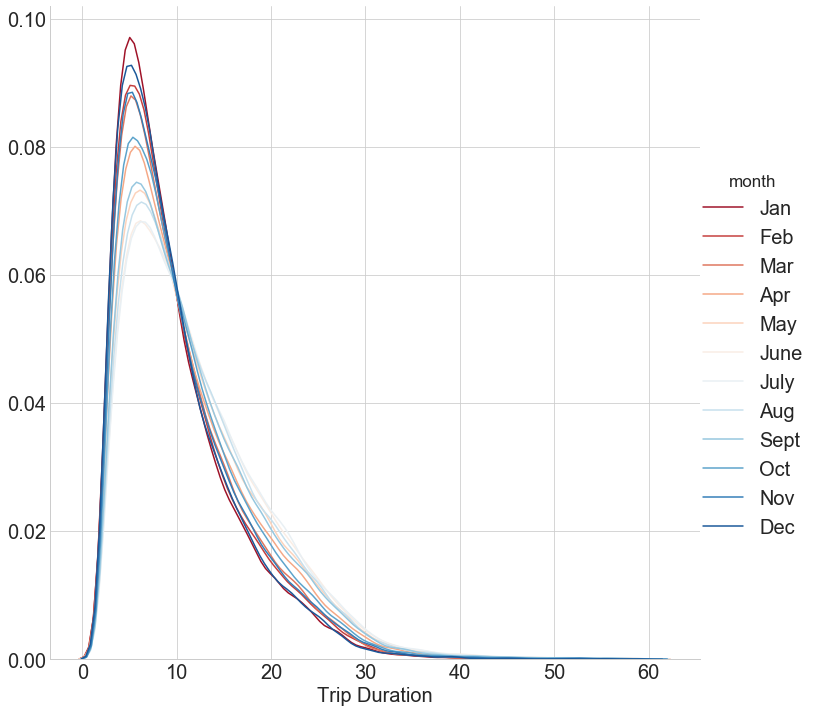

In [144]:
plt.figure(figsize=(20,10))
g = sns.FacetGrid(data, hue='month', size=10, hue_order=['Jan','Feb', 'Mar',
            'Apr','May','June',
            'July','Aug','Sept',
            'Oct','Nov','Dec'], palette="RdBu")
g.map(sns.kdeplot, "tripduration")
g.add_legend()
plt.xlabel("Trip Duration")

In [152]:
len(data.longitude_end.unique())

1047

In [164]:
list(zip(list(zip(data.longitude_start, data.latitude_start)), 
         list(zip(data.longitude_end, data.latitude_end))))[:5]

[((-87.63874200000002, 41.93132), (-87.648747, 41.933341)),
 ((-87.624117, 41.886024), (-87.623041, 41.867888)),
 ((-87.6353211408, 41.8777079559), (-87.64127743, 41.8815824)),
 ((-87.687051, 41.915533), (-87.67695, 41.90331)),
 ((-87.63253, 41.882664), (-87.6277335692, 41.884730200599996))]

In [165]:
data[['longitude_start','latitude_start','longitude_end','latitude_end']]

,longitude_start,latitude_start,longitude_end,latitude_end
0,-87.638742,41.931320,-87.648747,41.933341
1,-87.624117,41.886024,-87.623041,41.867888
2,-87.635321,41.877708,-87.641277,41.881582
3,-87.687051,41.915533,-87.676950,41.903310
4,-87.632530,41.882664,-87.627734,41.884730
5,-87.648568,41.908540,-87.697200,41.910440
6,-87.648043,41.954383,-87.650001,41.967968
7,-87.674101,41.961626,-87.654406,41.954245
8,-87.625813,41.834734,-87.654127,41.855136
9,-87.691392,41.917741,-87.656936,41.918216
